In [1]:
import MuMoT.MuMoT as mmt # if working directly from git clone
#import MuMoT as mmt # if working with pip installed module

Created `%%model` as an alias for `%%latex`.


In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [6]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
model4 = model3.substitute('U = N - \A - \B')

In [9]:
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x117b2fb70>


<IPython.core.display.Javascript object>


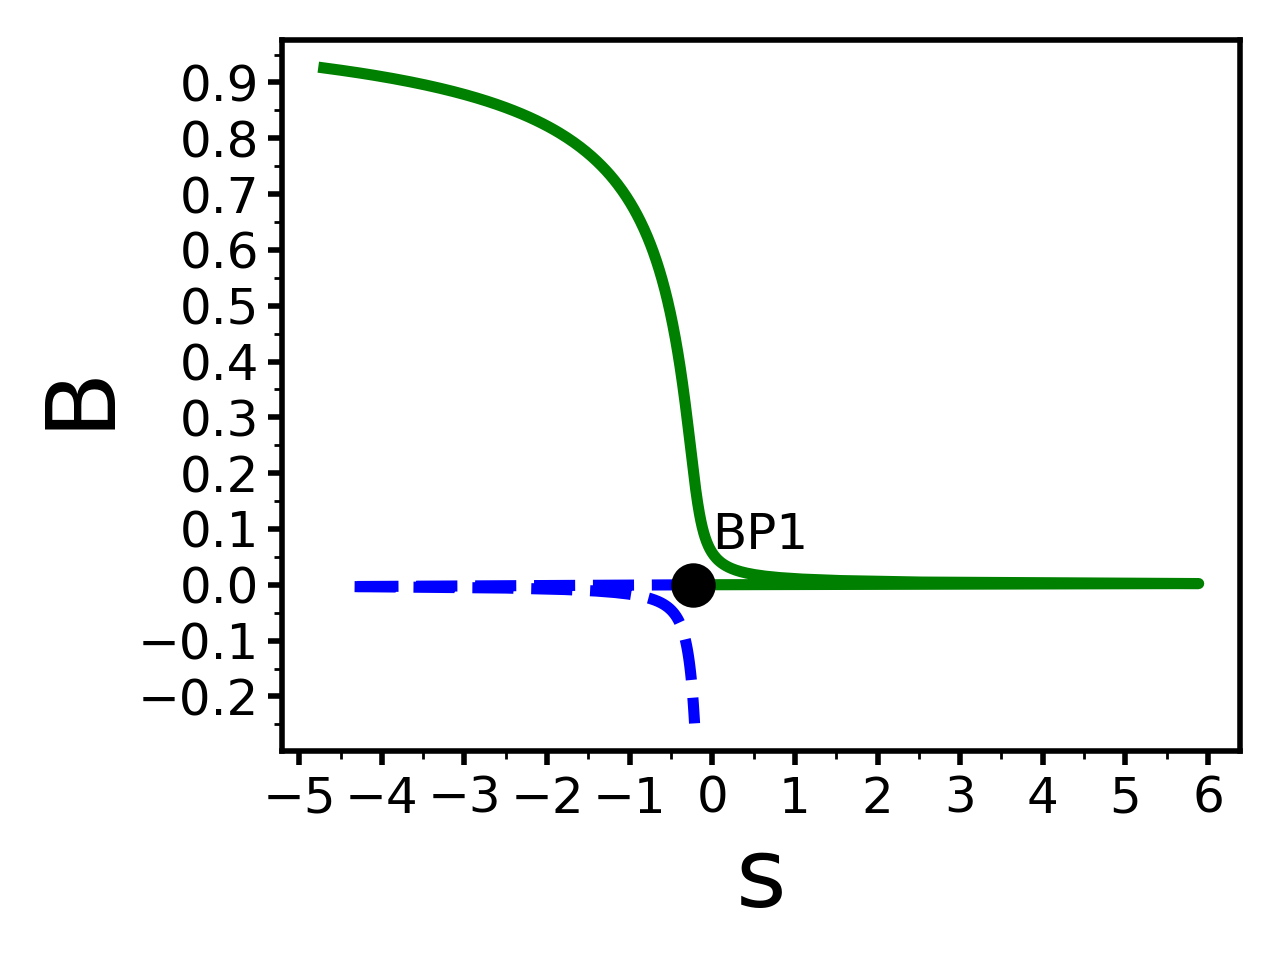

In [10]:
#modelBifCont1 = model4.bifurcation('s','A',plottingMethod='pyds')
modelBifCont1 = model4.bifurcation('s','B', plottingMethod='mumot', initSV=[['A', 0.1], ['B', 0.9]], 
                                   fontsize=35, BifParInit =5, ContMaxNumPoints=450)

In [11]:
modelBifCont1.showLogs()

Initial conditions chosen for state variables:  {'A': 0.1, 'B': 0.9}
Starting bifurcation analysis with parameters (Delta=10.0), (mu=10.0), at 2017-10-05 14:04:50.681381
Not converged:  [-0.26835246  1.38733964  4.84568242] 

BP Point found 
Special Points on curve:  [[-0.23439831176427106], [1.9591787402393549e-11], ['BP1']]


<IPython.core.display.Javascript object>


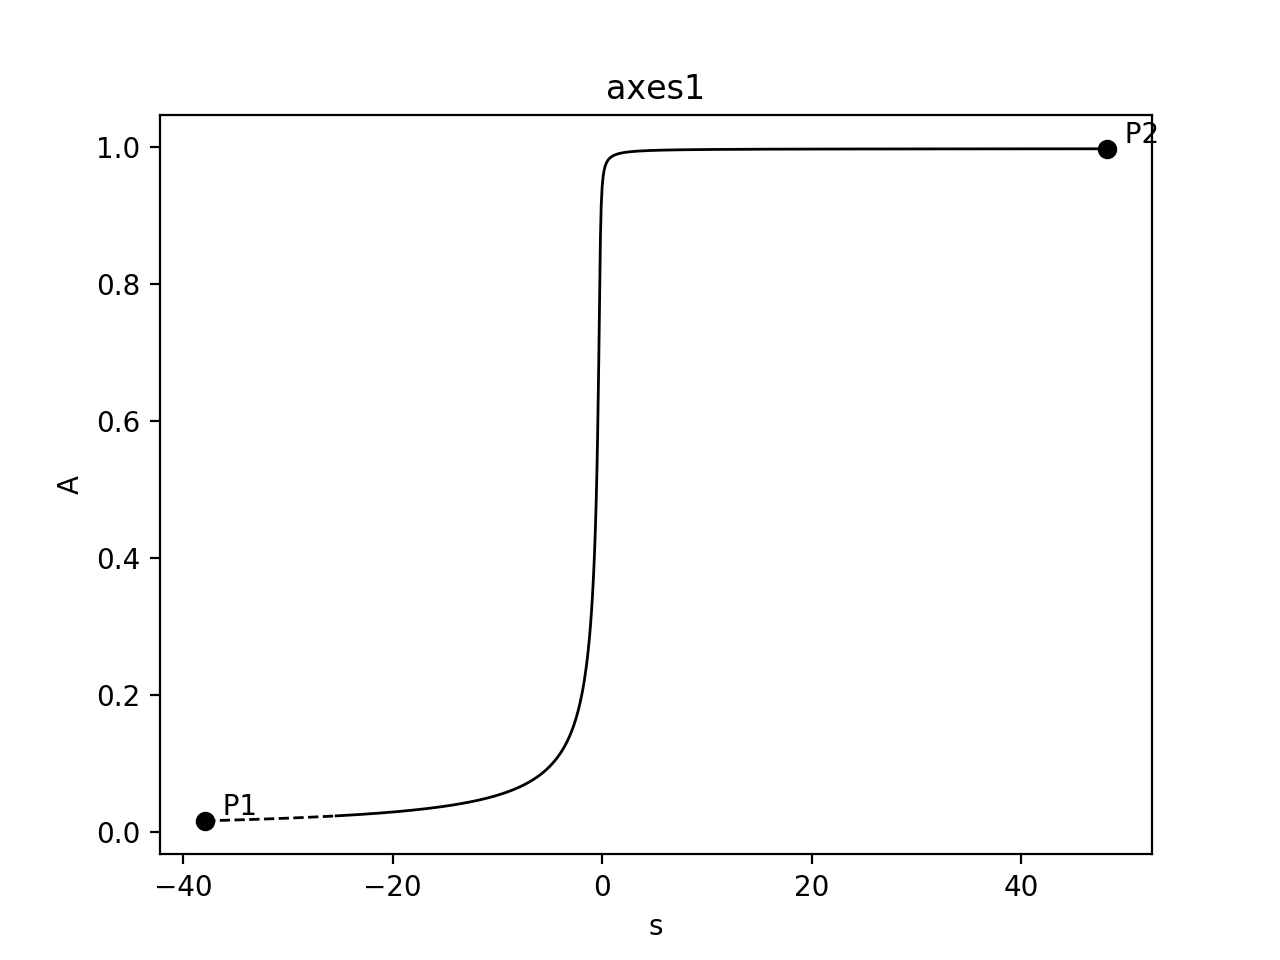

In [12]:
soloView0 = mmt.MuMoTbifurcationView(model4, None, 's', 'A', params = [('\mu', 1), ('v', 2), ('\Delta', 0)])

In [13]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [14]:
model6 = model5.substitute('U = N - \A - \B')

In [15]:
model6.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x118dd5780>


<IPython.core.display.Javascript object>


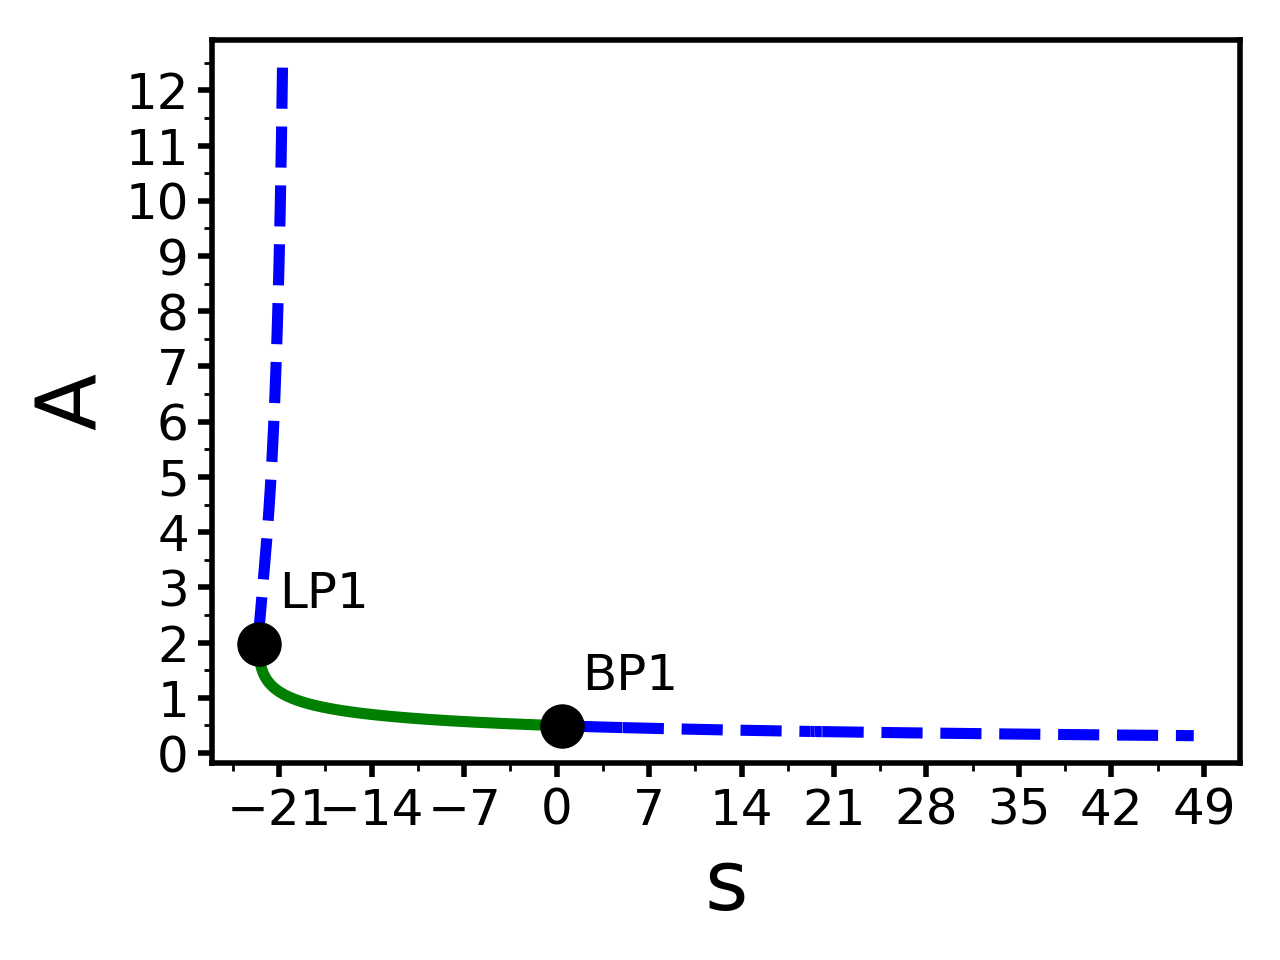

In [16]:
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='pyds')
modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot')
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot', initSV=[['A', 0.1], ['B', 0.9]])

In [17]:
modelBifCont1.showLogs()

Initial conditions chosen for state variables:  {'A': 0.1, 'B': 0.9}
Starting bifurcation analysis with parameters (Delta=10.0), (mu=10.0), at 2017-10-05 14:04:50.681381
Not converged:  [-0.26835246  1.38733964  4.84568242] 

BP Point found 
Special Points on curve:  [[-0.23439831176427106], [1.9591787402393549e-11], ['BP1']]


bar<ipywidgets.widgets.widget_string.HTML object at 0x1194ade48>


<IPython.core.display.Javascript object>


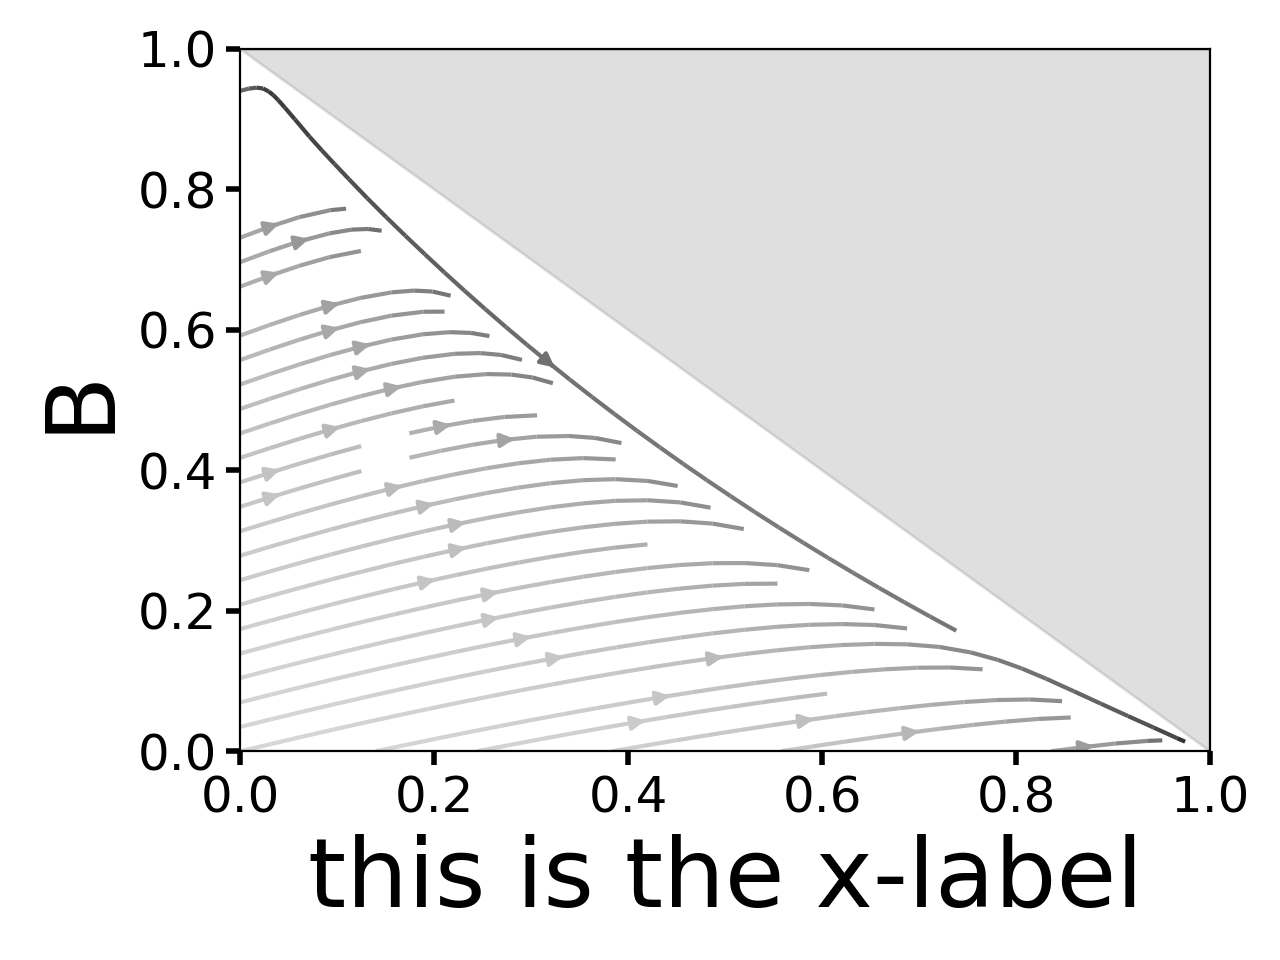

In [18]:
modelStreamCont1 = model4.stream('A', 'B',fontsize=35, xlab=r'this is the x-label')

In [19]:
modelStreamCont1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:07.931320


bar<ipywidgets.widgets.widget_string.HTML object at 0x119665860>


<IPython.core.display.Javascript object>


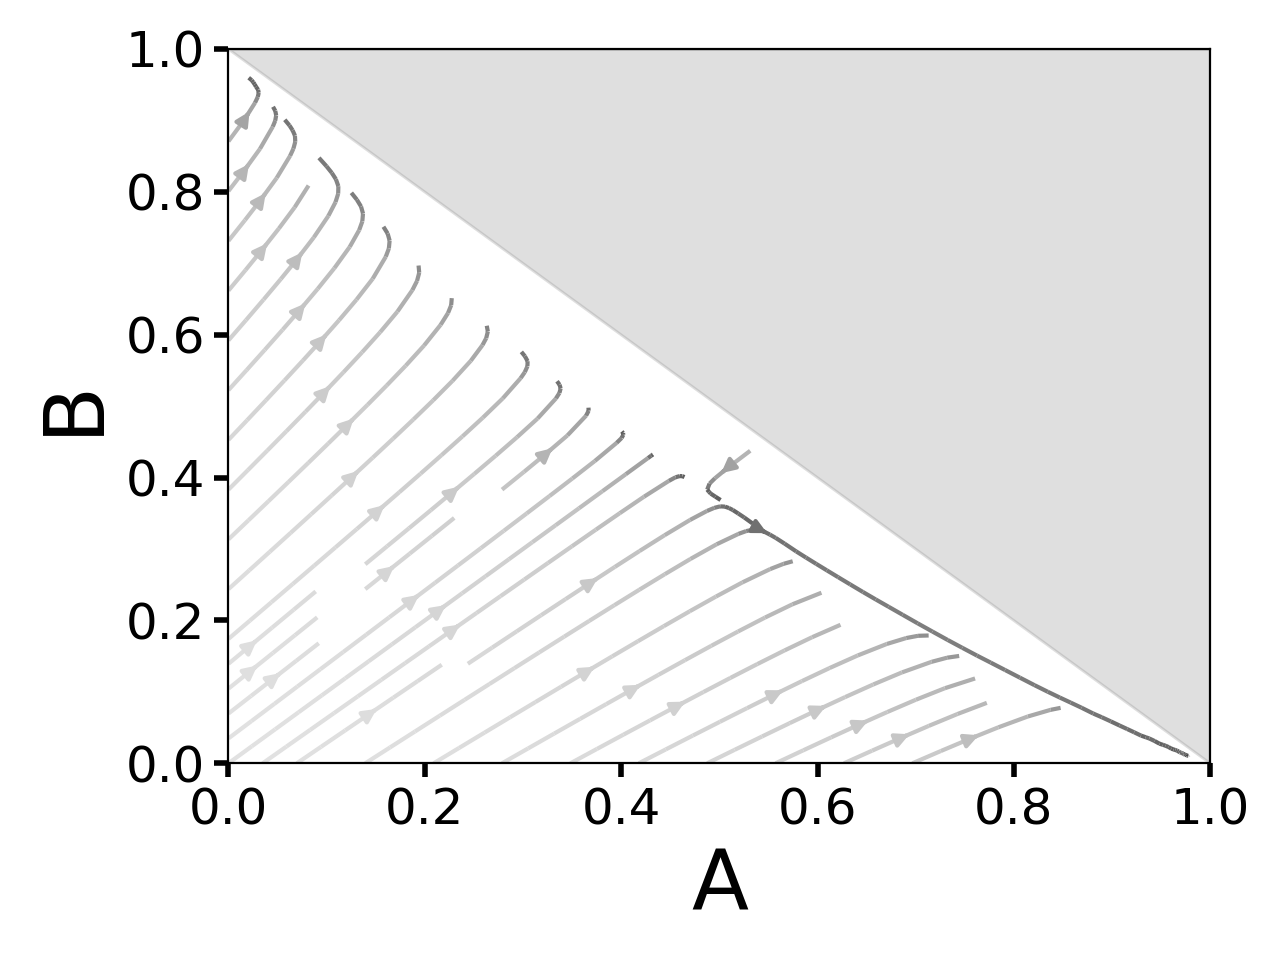

In [20]:
modelStreamCont2 = model6.stream('A', 'B')

In [21]:
modelStreamCont2.showLogs()

Starting 2d stream plot with parameters (s=10.0), (v=10.0), at 2017-10-05 14:05:08.545060


bar<ipywidgets.widgets.widget_string.HTML object at 0x117df9f28>


<IPython.core.display.Javascript object>


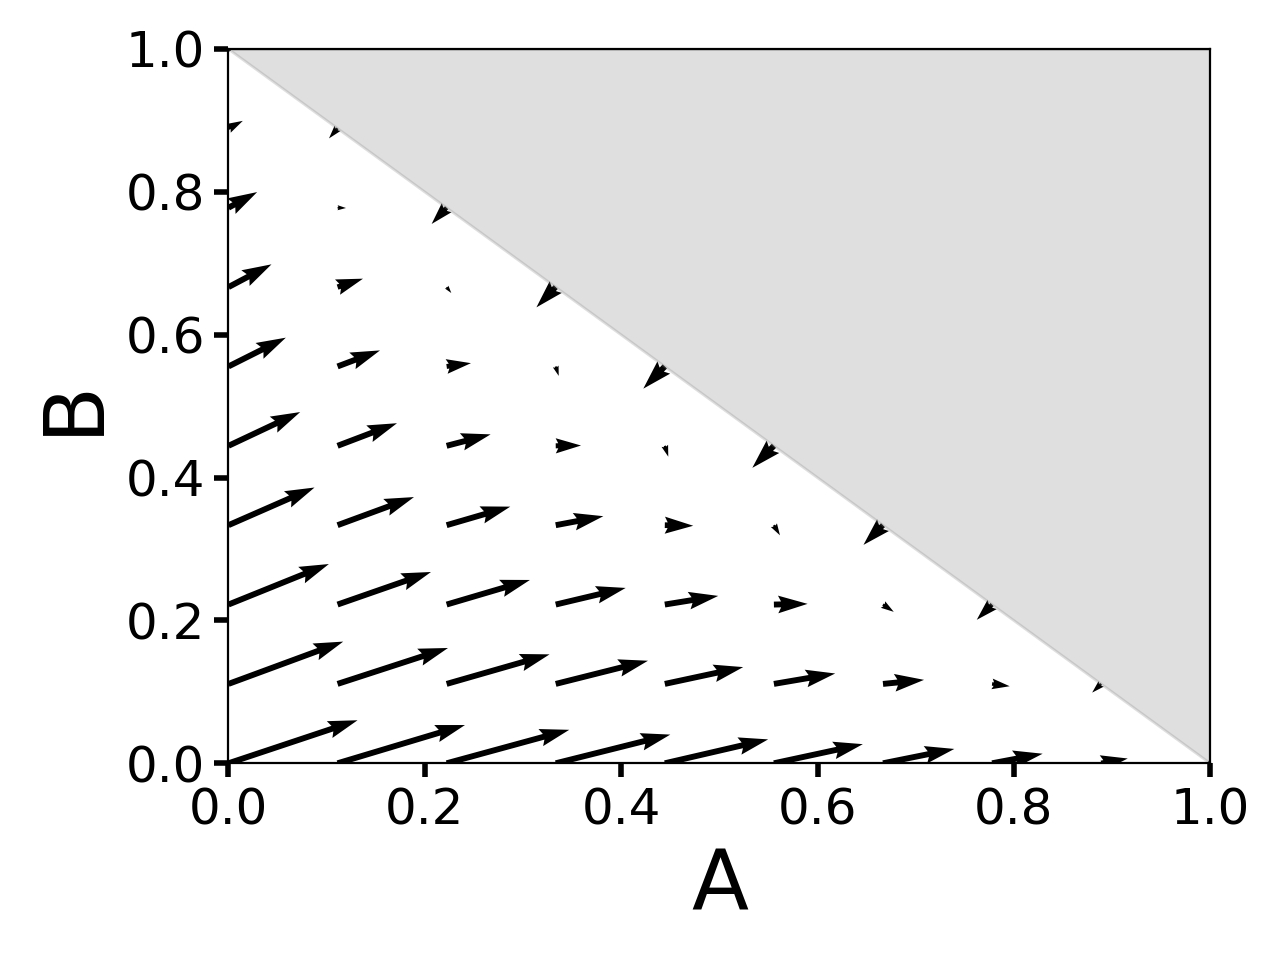

In [22]:
modelVectorCont1 = model4.vector('A', 'B')

In [23]:
modelVectorCont1.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:09.304853


In [24]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

<IPython.core.display.Latex object>

In [25]:
model7 = mmt.parseModel(In[24])

In [26]:
model8 = model7.substitute('U = N - A - B - C')

bar<ipywidgets.widgets.widget_string.HTML object at 0x119ec2e80>


<IPython.core.display.Javascript object>


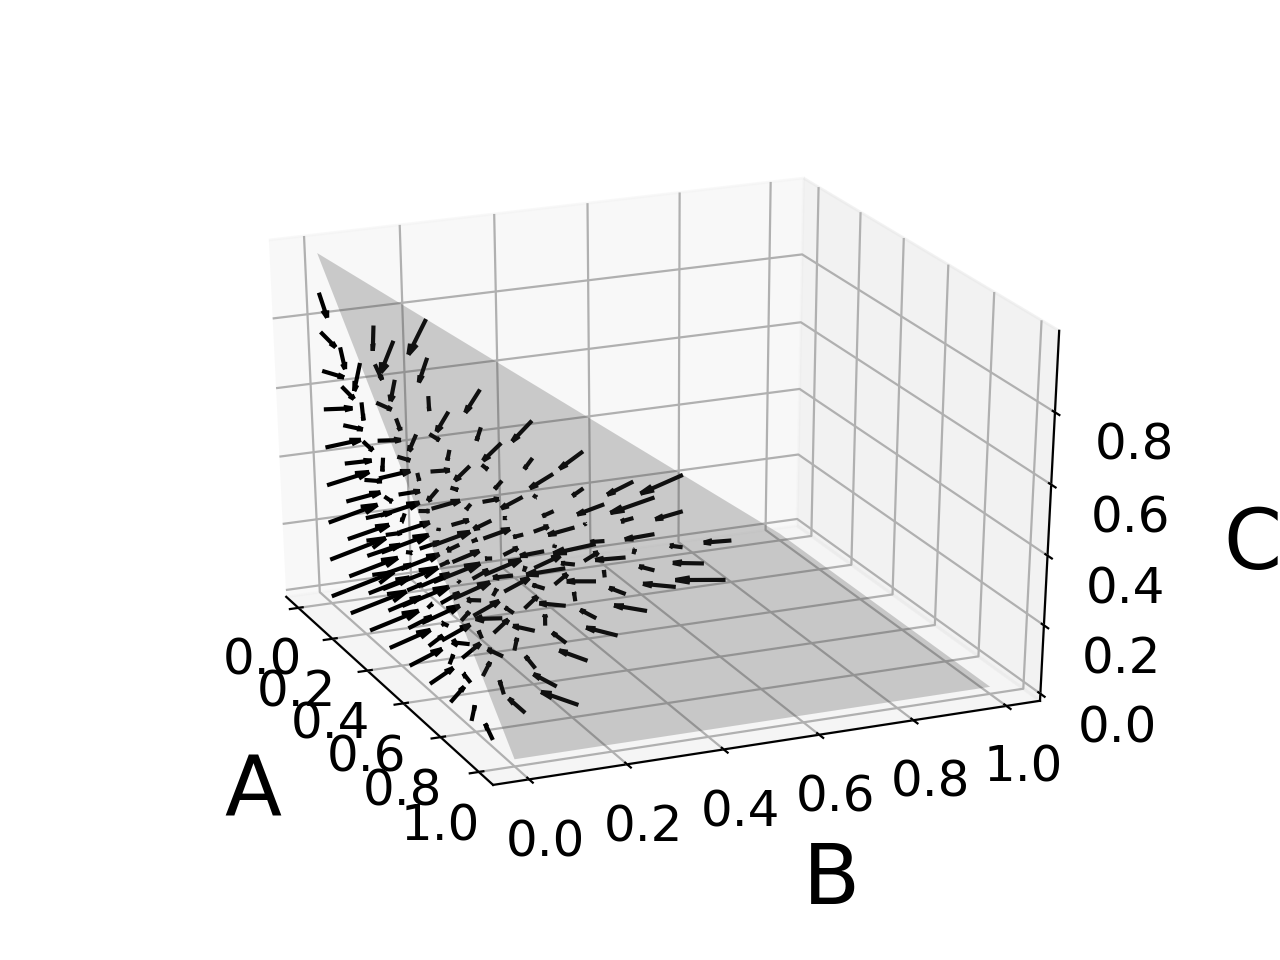

In [27]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [28]:
modelVectorCont2.showLogs()

Starting 3d vector plot with parameters (a_{1}=10.0), (a_{2}=10.0), (a_{3}=10.0), (g_{1}=10.0), (g_{2}=10.0), (g_{3}=10.0), (r_{1}=10.0), (r_{2}=10.0), (r_{3}=10.0), (s=10.0), at 2017-10-05 14:05:09.723199


In [29]:
#model4._get_solutions()

<IPython.core.display.Javascript object>


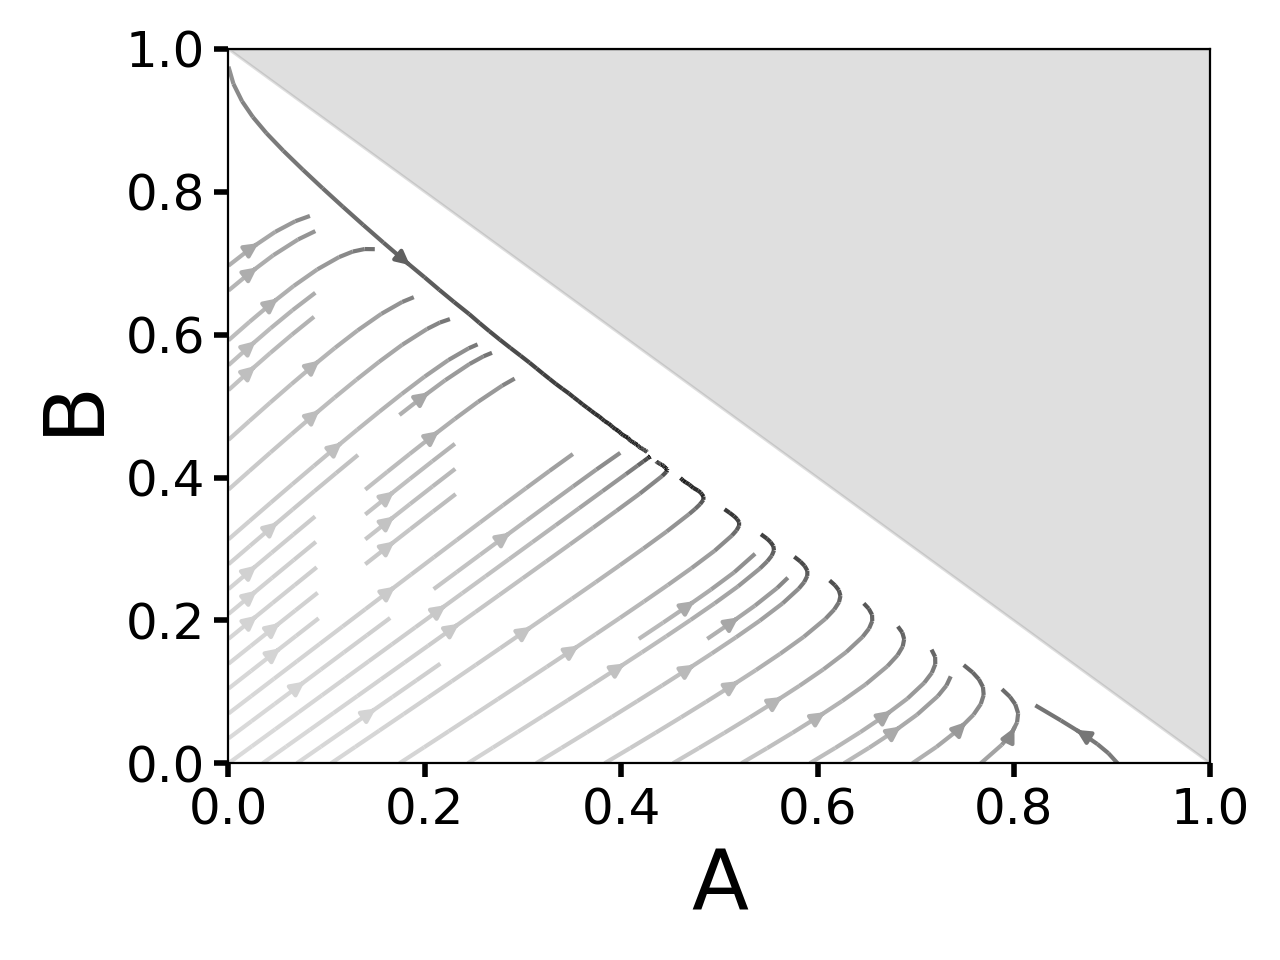

In [30]:
soloView1 = mmt.MuMoTstreamView(model6, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [31]:
model9 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = 3')

<IPython.core.display.Javascript object>


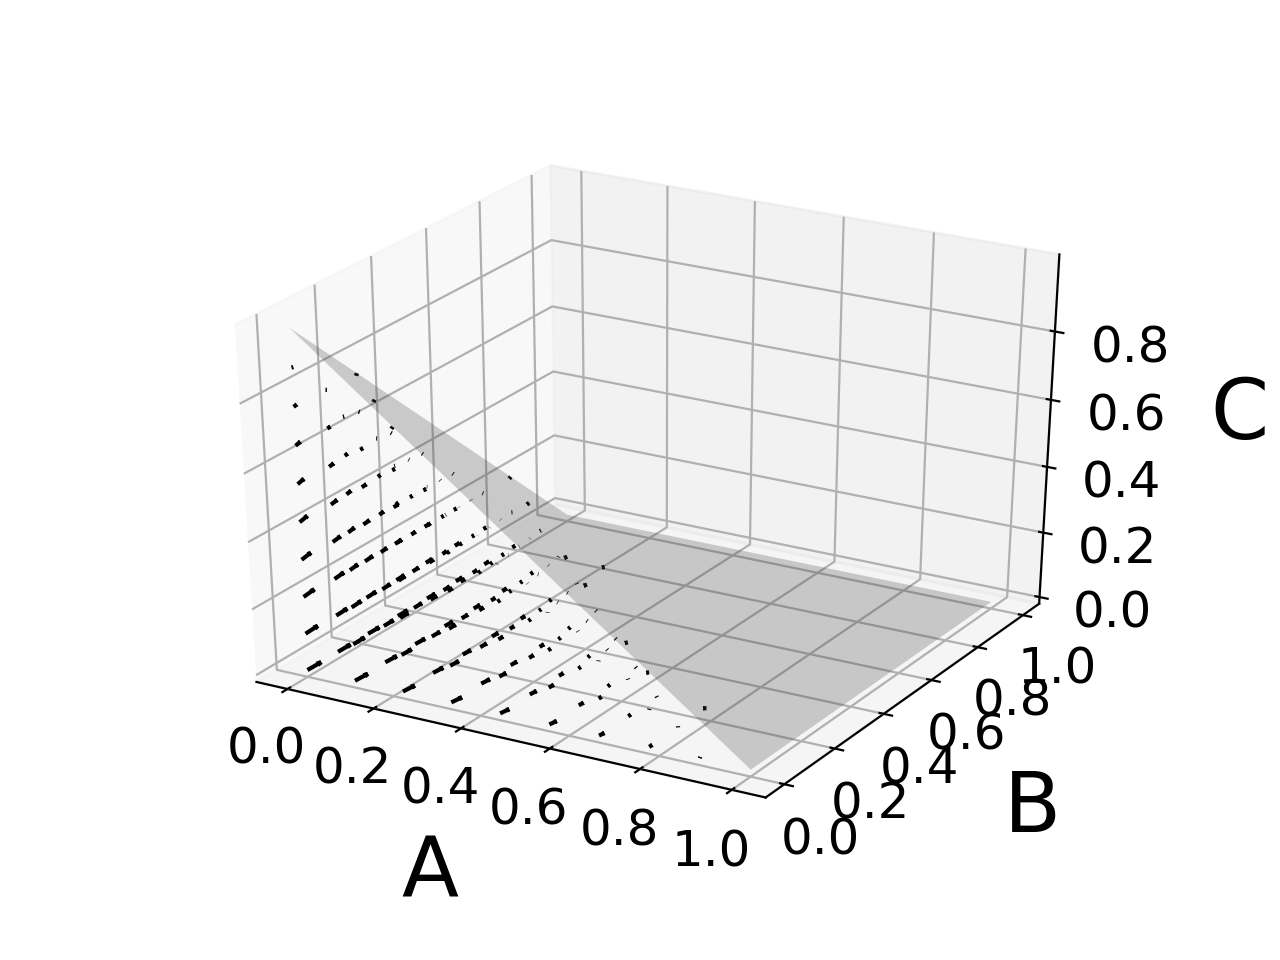

In [32]:
soloView2 = mmt.MuMoTvectorView(model9, None, 'A', 'B', 'C', params = [('s', 1), ('a', 1/2), ('r', 2), ('g', 2)])

bar<ipywidgets.widgets.widget_string.HTML object at 0x11a7be438>


<IPython.core.display.Javascript object>


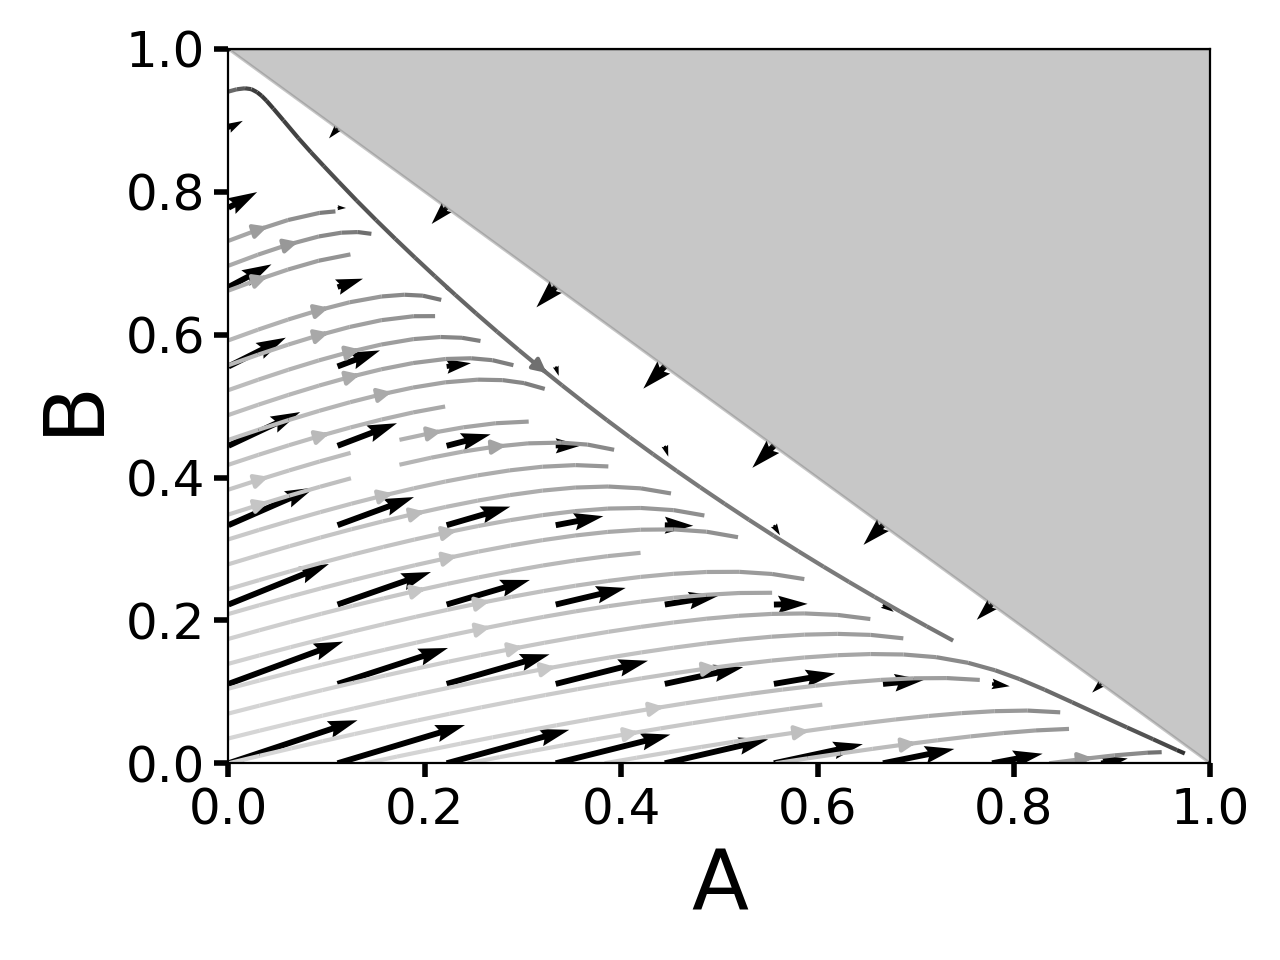

In [33]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True)

In [34]:
multiController1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:11.563028
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:12.058020


bar<ipywidgets.widgets.widget_string.HTML object at 0x11abfd6d8>


<IPython.core.display.Javascript object>


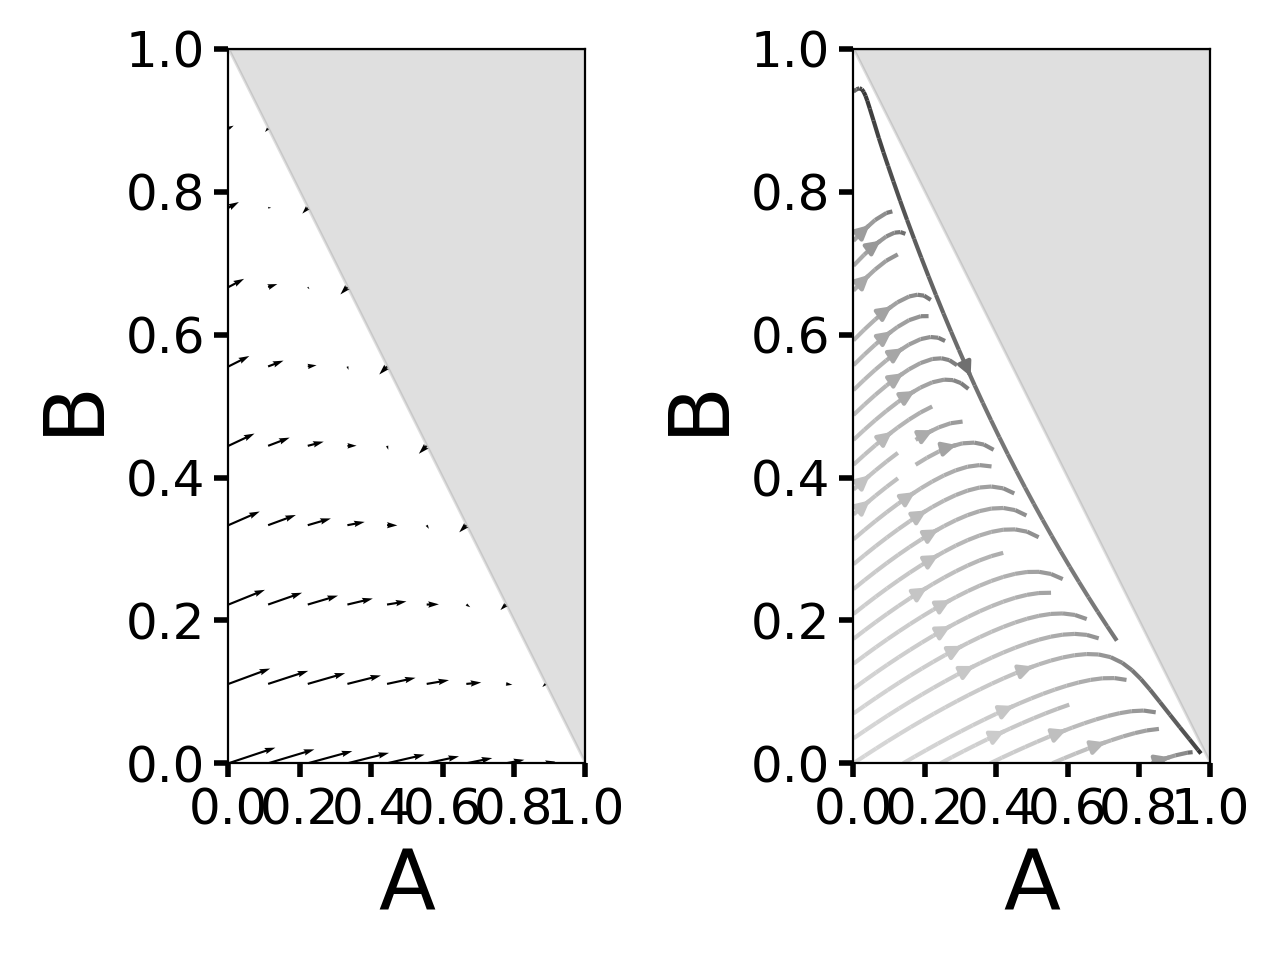

In [35]:
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True)])
#multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True), model4.bifurcation('s', 'A', silent = True)])

In [36]:
multiController2.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:12.333693
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-05 14:05:12.430731


In [37]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

bar<ipywidgets.widgets.widget_string.HTML object at 0x11b416fd0>


<IPython.core.display.Javascript object>


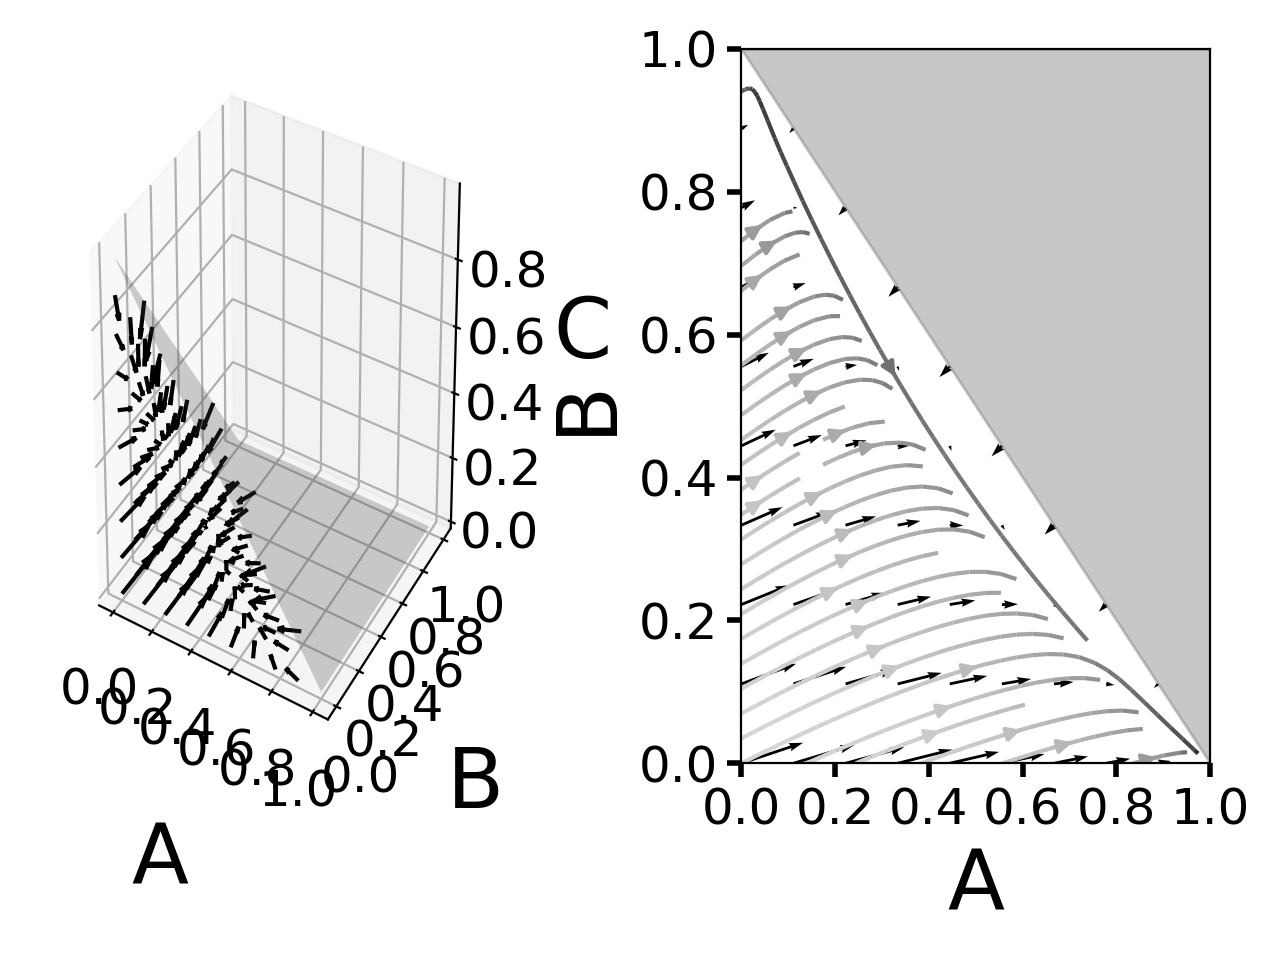

In [38]:
multiController4 = mmt.MuMoTmultiController([model9.vector('A', 'B', 'C', silent = True), multiController3])

In [39]:
multiController4.showLogs()

Starting 3d vector plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-05 14:05:13.175764
Starting 2d stream plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-05 14:05:13.272976
Starting 2d vector plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-05 14:05:13.689219
